# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

After repeating the simulation 5000 times:
Chance of winning if staying with selected door: 0.3268
Chance of winning if switching to another door: 0.6732


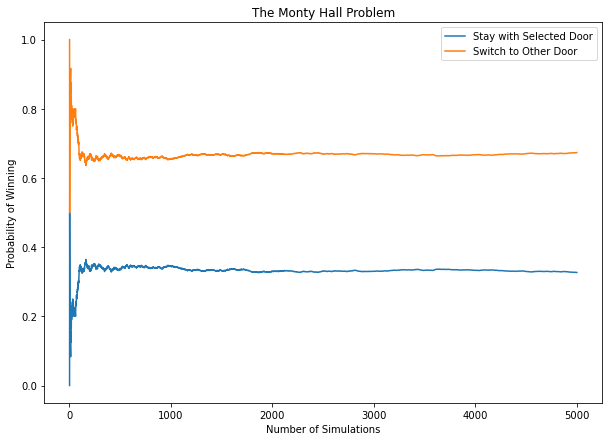

In [7]:
# Your code here
n_sim = 5000
doors = [1,2,3]
if_stayed = []
if_switched = []

for n in range(n_sim):
    # random int representing door hiding car
    d_car = np.random.randint(1,4)
    
    # random int representing player's selection
    d_opt1 = np.random.randint(1,4)
    
    # get the remaining doors that were not selected
    remaining_doors = [d for d in doors if d != d_opt1]
    # pick the door != d_car to show goat
    show_goat = [d for d in remaining_doors if d != d_car]
    # select a random door in 'show_goat'
    to_open = np.random.choice(show_goat)
    
    # if switching door
    d_opt2 = [d for d in doors if d != to_open and d != d_opt1][0]
    
    # if staying with same choice:
    stay = 1 if d_opt1 == d_car else 0
    if_stayed.append(stay)
        
    # if switching to the other door
    switch = 1 if d_opt2 == d_car else 0
    if_switched.append(switch)

print(f'After repeating the simulation {n_sim} times:')
print('Chance of winning if staying with selected door:', np.mean(if_stayed))
print('Chance of winning if switching to another door:', np.mean(if_switched))
xs = np.arange(1,(n_sim+1))
plt.figure(figsize=(10,7))
plt.plot(xs, [np.mean(if_stayed[:i]) for i in xs], label='Stay with Selected Door')
plt.plot(xs, [np.mean(if_switched[:i]) for i in xs], label='Switch to Other Door')
plt.xlabel('Number of Simulations')
plt.ylabel('Probability of Winning')
plt.title('The Monty Hall Problem')
plt.legend()               
plt.show();

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 